# Nuclei Deconvolution and Compare intensities to ground truth

This notebook shows deconvolution of a simulated image.  The images are similar to the ones generated in the ABRF study [here](https://sites.google.com/view/lmrg-image-analysis-study) 


Question:  Does deconvolution restore intensities closer to ground truth?


## Open test images

1.  Get images from this folder https://www.dropbox.com/scl/fo/ngs73x29t1ch8208d75lv/h?rlkey=7acq2epqp1f1x039q833ry6p4&dl=0 
2.  Beside the ```PoL-BioImage-Analysis-TS-GPU-Accelerated-Image-Analysis``` folder create an images folder and place the deconvolution folder inside of it.
2.  In the code snippet below change ```im_path``` to the local location on your machine where you put the above folder
3.  Print out the size of the images to verify they loaded propertly.  Note that the ground truth and image are different sizes, that is something we will have to deal with (with a careful resizing operation) before comparing. 

In [1]:
from skimage.io import imread
from decon_helper import image_path

image_name='SIM 1.5 NA.tif'
truth_name='phantom.tif'
psf_name='PSF 1.5 NA.tif'

im=imread(image_path / image_name)
truth=imread(image_path / truth_name)
im=im.astype('float32')
print(im.shape, truth.shape)
psf=imread(image_path / psf_name)
psf=psf.astype('float32')

(119, 202, 202) (119, 202, 202)


## Show image, truth and PSF

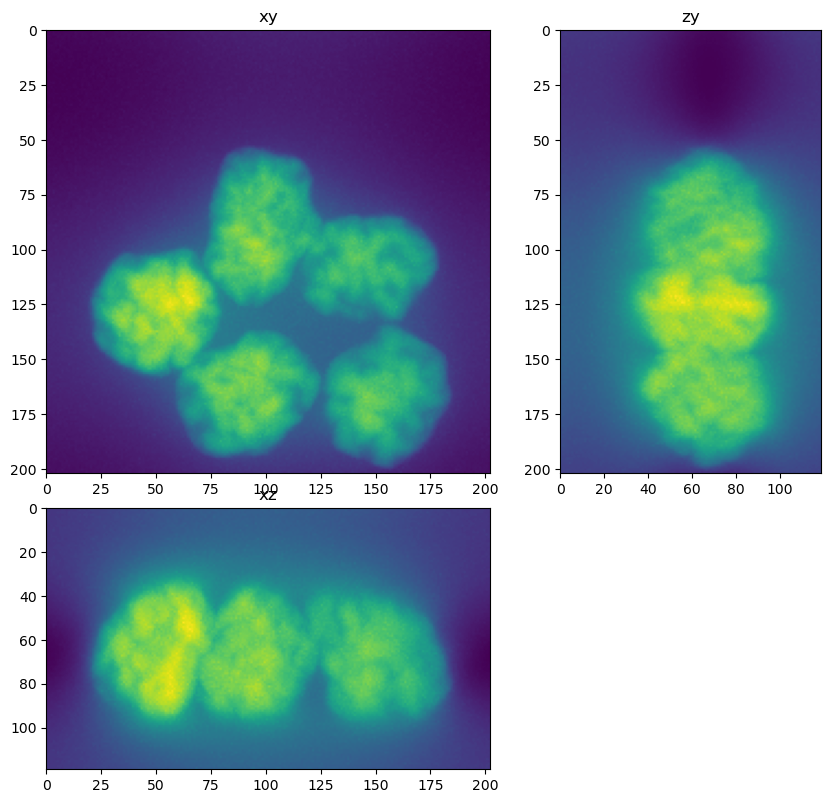

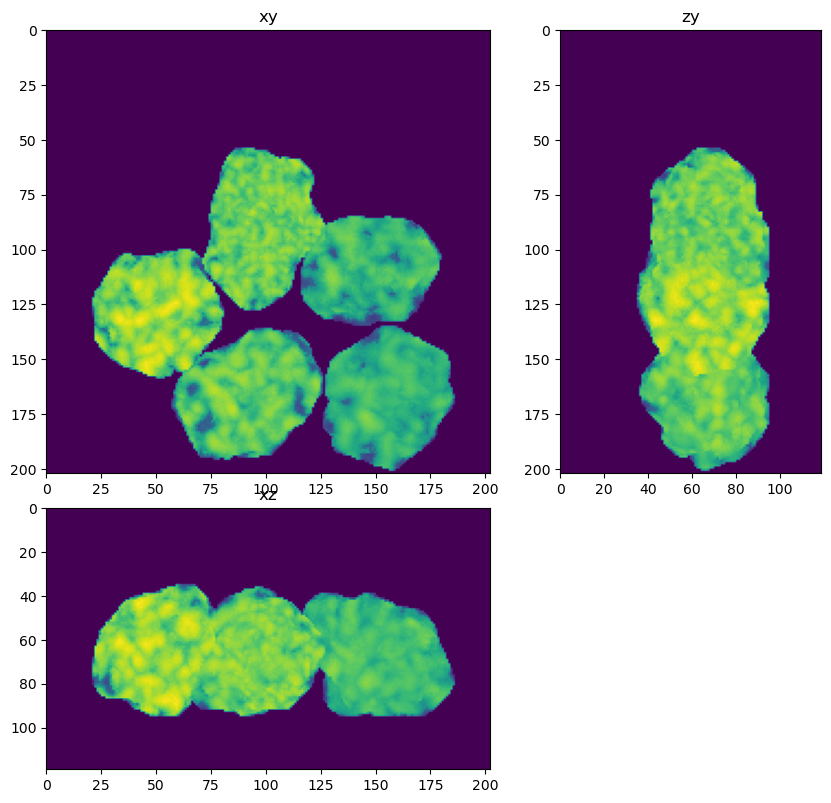

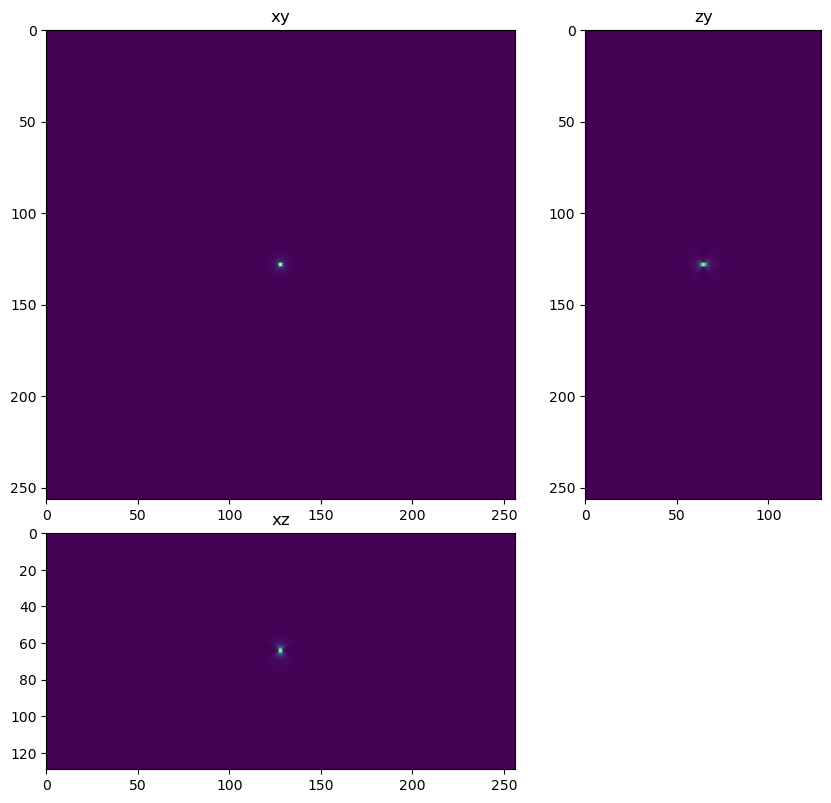

In [2]:
from tnia.plotting.projections import show_xyz_max

fig=show_xyz_max(im)
fig=show_xyz_max(truth)
fig=show_xyz_max(psf)

## Import Deconvolotion and make a 'deconvolver'



In [3]:
try:
    
    from clij2fft.richardson_lucy import richardson_lucy_nc
    print('clij2fft non-circulant rl imported')
    regularization_factor=0.0002
    def deconvolver(img, psf, iterations):
        return richardson_lucy_nc(img, psf, iterations, regularization_factor)
    
except ImportError:
    print('clij2fft non-circulant rl not imported')
    try:
        import RedLionfishDeconv as rl
        print('redlionfish rl imported')
        def deconvolver(img, psf, iterations):
            return rl.doRLDeconvolutionFromNpArrays(img, psf, niter=iterations, method='gpu', resAsUint8=False )
    except ImportError:
        print('redlionfish rl not imported')

clij2fft non-circulant rl imported


## Run deconvolution for varying iteration numbers

get lib


2 warnings generated.
2 warnings generated.



Richardson Lucy Started
0 10 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 
Richardson Lucy Finished

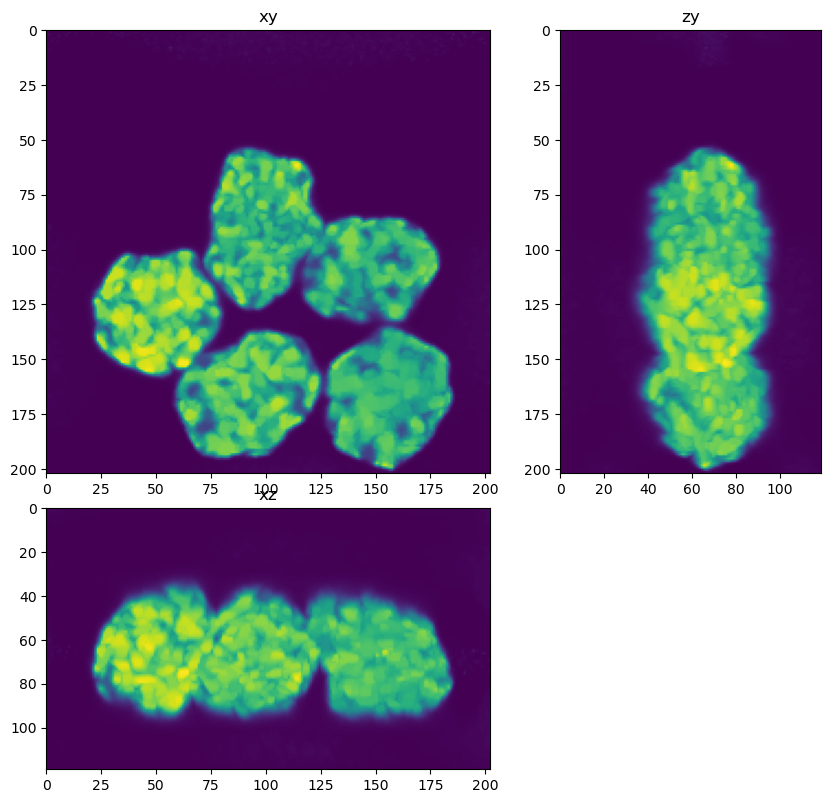

In [4]:
iterations=[20,50,100,200,500]
#iterations=[200,500,2000]

decons = [deconvolver(im, psf, i) for i in iterations]

fig = show_xyz_max(decons[-1])

## Compare to Ground Truth


In [5]:
import numpy as np

def MSE(a,b):
    return np.square(np.subtract(a,b)).mean()

def RMSE(a,b):
    return np.sqrt(MSE(a,b))

print('RMSE image and ground truth',RMSE(truth, im))

for decon, i in zip(decons, iterations):
    print('RMSE deconvolution',i,'iterations and ground truth',RMSE(truth, decon))
    

RMSE image and ground truth 7267.49
RMSE deconvolution 20 iterations and ground truth 5507.9326
RMSE deconvolution 50 iterations and ground truth 4435.0576
RMSE deconvolution 100 iterations and ground truth 3700.5608
RMSE deconvolution 200 iterations and ground truth 3073.1455
RMSE deconvolution 500 iterations and ground truth 2474.483


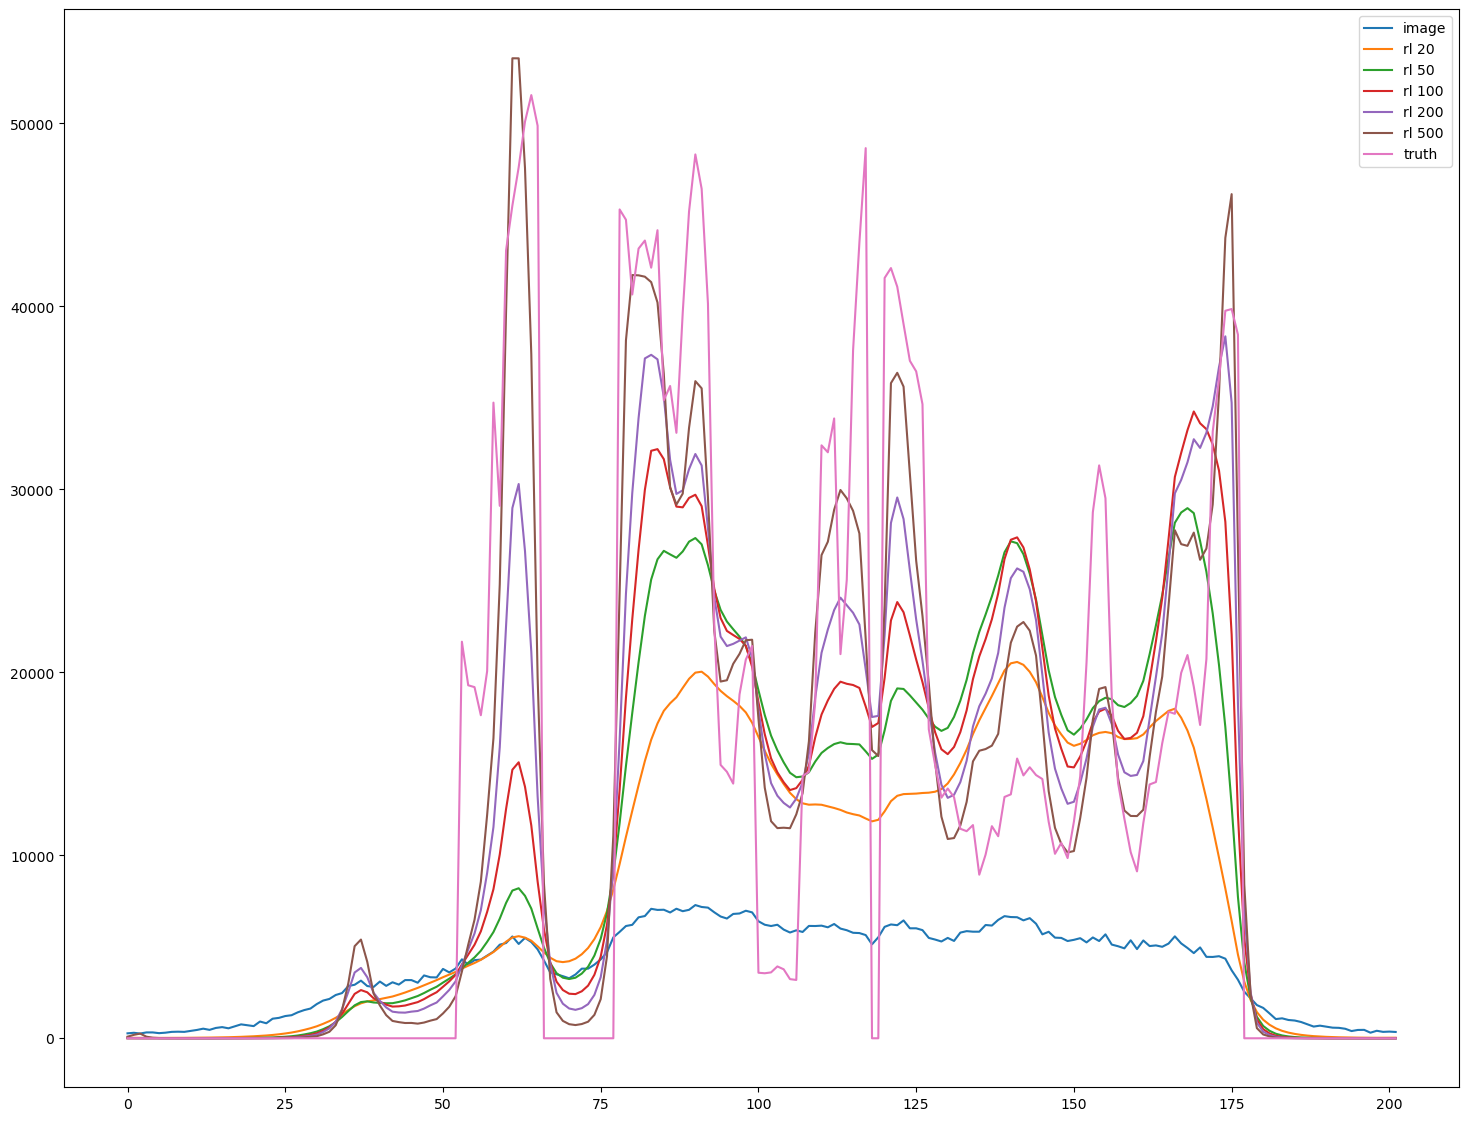

In [6]:
import matplotlib.pyplot as plt
s=im.shape

fig, ax = plt.subplots(figsize=(18,14))

line=im[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label = 'image')

for decon, i in zip(decons, iterations):
    line=decon[int(s[0]/2),int(s[1]/2),:]
    ax.plot(line, label='rl '+str(i))

line=truth[int(s[0]/2),int(s[1]/2),:]
ax.plot(line, label='truth')

ax.legend()

## Visualize in Napari

In [7]:
import napari
viewer=napari.Viewer()

viewer.add_image(im)

for decon, i in zip(decons, iterations):
    viewer.add_image(decon,name=str(i)+' iterations')
 
viewer.add_image(truth)


<Image layer 'truth' at 0x7f1c0bfc2e50>